## Network Theory

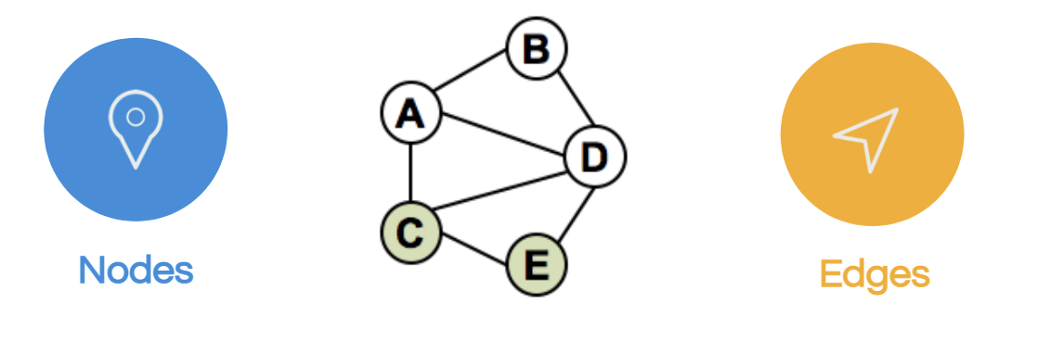

- Nodes (A,B,C,D,E in the example) are usually representing entities in the network, and can hold self-properties (such as weight, size, position and any other attribute) and network-based properties (such as Degree- number of neighbors or Cluster- a connected component the node belongs to etc.).
- Edges represent the connections between the nodes, and might hold properties as well (such as weight)

## Use Datasets

In [10]:
import pandas as pd
df = pd.read_csv("bola.csv")
df

,From,To
0,Neymar,Coutinho
1,Messi,Benzema
2,Ronaldo,Firminho
3,Werner,Kane
4,Neymar,Messi
5,Neymar,Mbappe
6,Messi,Lavezzi
7,Messi,Donaruma
8,Ronaldo,Morata
9,Ronaldo,Falcao


In [11]:
import networkx as nx
my_graph = nx.from_pandas_edgelist(df, source ="From", target = "To")

In [12]:
type(my_graph)

networkx.classes.graph.Graph

In [13]:
nx.info(my_graph)

'Name: \nType: Graph\nNumber of nodes: 18\nNumber of edges: 21\nAverage degree:   2.3333'

In [14]:
#Check all nodes
my_graph.nodes()

NodeView(('Neymar', 'Coutinho', 'Messi', 'Benzema', 'Ronaldo', 'Firminho', 'Werner', 'Kane', 'Messi ', 'Mbappe', 'Lavezzi', 'Donaruma', 'Morata', 'Falcao', 'Sterling', 'Grealish', 'Lewandowski', 'Muller'))

In [20]:
#Check all edges
my_graph.edges()

EdgeView([('Neymar', 'Coutinho'), ('Neymar', 'Messi '), ('Neymar', 'Mbappe'), ('Coutinho', 'Werner'), ('Coutinho', 'Benzema'), ('Coutinho', 'Firminho'), ('Messi', 'Benzema'), ('Messi', 'Lavezzi'), ('Messi', 'Donaruma'), ('Messi', 'Sterling'), ('Messi', 'Ronaldo'), ('Benzema', 'Firminho'), ('Ronaldo', 'Firminho'), ('Ronaldo', 'Morata'), ('Ronaldo', 'Falcao'), ('Ronaldo', 'Werner'), ('Firminho', 'Kane'), ('Werner', 'Kane'), ('Lavezzi', 'Lewandowski'), ('Donaruma', 'Grealish'), ('Morata', 'Muller'), ('Grealish', 'Lingard')])

In [19]:
#Adding edge
my_graph.add_edge("Lingard", "Grealish")

## Visualization

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

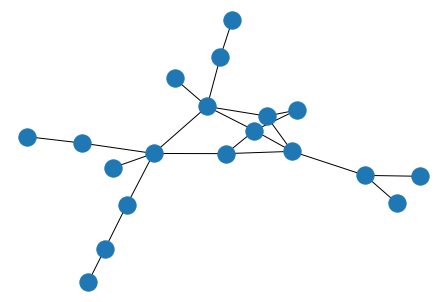

In [22]:
#!pip install decorator==4.4.2
#don't forget to restart kernel
nx.draw(my_graph)

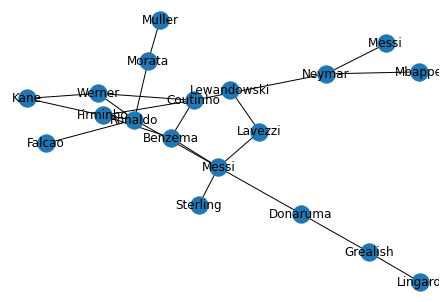

In [23]:
import warnings
warnings.filterwarnings("ignore")

nx.draw(my_graph, with_labels = True)

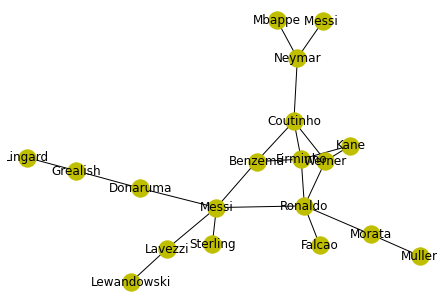

In [26]:
nx.draw(my_graph, with_labels = True, node_color = 'y')

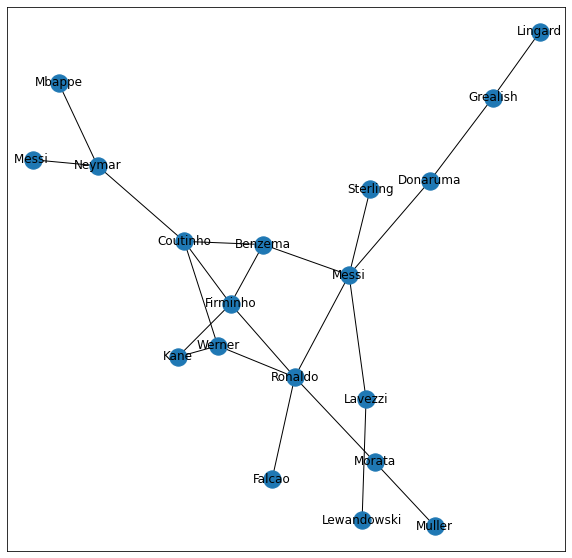

In [27]:
#other script: draw_networkx
plt.figure(figsize = (10, 10))
nx.draw_networkx(my_graph)
plt.savefig("football.png")
plt.show()

## Analysis

In [28]:
#General Connection
nx.degree(my_graph)

DegreeView({'Neymar': 3, 'Coutinho': 4, 'Messi': 5, 'Benzema': 3, 'Ronaldo': 5, 'Firminho': 4, 'Werner': 3, 'Kane': 2, 'Messi ': 1, 'Mbappe': 1, 'Lavezzi': 2, 'Donaruma': 2, 'Morata': 2, 'Falcao': 1, 'Sterling': 1, 'Grealish': 2, 'Lewandowski': 1, 'Muller': 1, 'Lingard': 1})

Clinton has 3 connections, let's look up

In [29]:
df.head(1)

,From,To
0,Neymar,Coutinho


In [30]:
df[(df.From == 'Neymar') |(df.To == 'Neymar')]

,From,To
0,Neymar,Coutinho
4,Neymar,Messi
5,Neymar,Mbappe


In [31]:
#Degree of Connection
print(nx.degree(my_graph, "Ronaldo"))
df[(df.From == 'Ronaldo') |(df.To == 'Ronaldo')]

5


,From,To
2,Ronaldo,Firminho
8,Ronaldo,Morata
9,Ronaldo,Falcao
12,Messi,Ronaldo
13,Ronaldo,Werner


In [32]:
#Most influental
most_influental = nx.degree_centrality(my_graph)
most_influental

{'Neymar': 0.16666666666666666,
 'Coutinho': 0.2222222222222222,
 'Messi': 0.2777777777777778,
 'Benzema': 0.16666666666666666,
 'Ronaldo': 0.2777777777777778,
 'Firminho': 0.2222222222222222,
 'Werner': 0.16666666666666666,
 'Kane': 0.1111111111111111,
 'Messi ': 0.05555555555555555,
 'Mbappe': 0.05555555555555555,
 'Lavezzi': 0.1111111111111111,
 'Donaruma': 0.1111111111111111,
 'Morata': 0.1111111111111111,
 'Falcao': 0.05555555555555555,
 'Sterling': 0.05555555555555555,
 'Grealish': 0.1111111111111111,
 'Lewandowski': 0.05555555555555555,
 'Muller': 0.05555555555555555,
 'Lingard': 0.05555555555555555}

In [33]:
for w in sorted(most_influental, key = most_influental.get, reverse = True):
    print(w, round(most_influental[w],2))

Messi 0.28
Ronaldo 0.28
Coutinho 0.22
Firminho 0.22
Neymar 0.17
Benzema 0.17
Werner 0.17
Kane 0.11
Lavezzi 0.11
Donaruma 0.11
Morata 0.11
Grealish 0.11
Messi  0.06
Mbappe 0.06
Falcao 0.06
Sterling 0.06
Lewandowski 0.06
Muller 0.06
Lingard 0.06


In [34]:
#Most important connection
most_importance = nx.eigenvector_centrality(my_graph)
for w in sorted(most_importance, key = most_importance.get, reverse = True):
    print(w, round(most_importance[w],2))

Firminho 0.43
Ronaldo 0.42
Coutinho 0.38
Benzema 0.35
Messi 0.34
Werner 0.32
Kane 0.23
Neymar 0.15
Morata 0.14
Falcao 0.13
Donaruma 0.12
Lavezzi 0.12
Sterling 0.11
Messi  0.04
Mbappe 0.04
Muller 0.04
Grealish 0.04
Lewandowski 0.04
Lingard 0.01


In [35]:
#What is the shortest connection from Lewi to Grealish
nx.shortest_path(my_graph,"Lewandowski","Grealish")

['Lewandowski', 'Lavezzi', 'Messi', 'Donaruma', 'Grealish']

In [36]:
#Best Connector
best_connector = nx.betweenness_centrality(my_graph)
for w in sorted(best_connector, key = best_connector.get, reverse = True):
    print(w, round(best_connector[w],2))

Messi 0.56
Ronaldo 0.41
Coutinho 0.3
Benzema 0.22
Neymar 0.22
Donaruma 0.21
Firminho 0.13
Lavezzi 0.11
Morata 0.11
Grealish 0.11
Werner 0.09
Kane 0.0
Messi  0.0
Mbappe 0.0
Falcao 0.0
Sterling 0.0
Lewandowski 0.0
Muller 0.0
Lingard 0.0


## Building a subgroup

In [37]:
group1 = nx.bfs_tree(my_graph,"Ronaldo")
group2 = nx.bfs_tree(my_graph,"Mbappe")

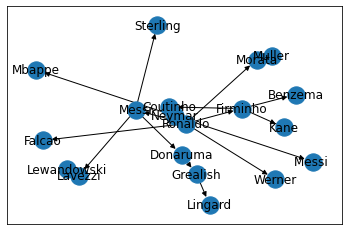

In [38]:
nx.draw_networkx(group1)

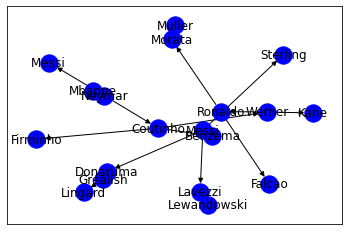

In [40]:
nx.draw_networkx(group2, node_color = 'b')

## Multi Column

In [ ]:
votes_data = pd.read_excel('ESC2018_GF.xlsx',sheet_name='Combined result', header = 1)
votes_data = votes_data.iloc[:,2:]
votes_data.head()

In [ ]:
votes_melted = votes_data.melt(
    ['Country','Total'],
    var_name = 'Source Country',value_name='points')    

votes_melted

In [ ]:
G = nx.from_pandas_edgelist(votes_melted, 
                            source='Source Country',
                            target='Country',
                            edge_attr='points',
                            create_using=nx.DiGraph())
                            
nx.draw_networkx(G)